# Workshop 4: Gradient Descent

## 1. Derivative
#### Exercise 1. Could you use `matplotlib` to draw the graphic of function
$$y=2x^2+100x+70$$

In [1]:
import matplotlib.pyplot as plt

<AxesSubplot:>

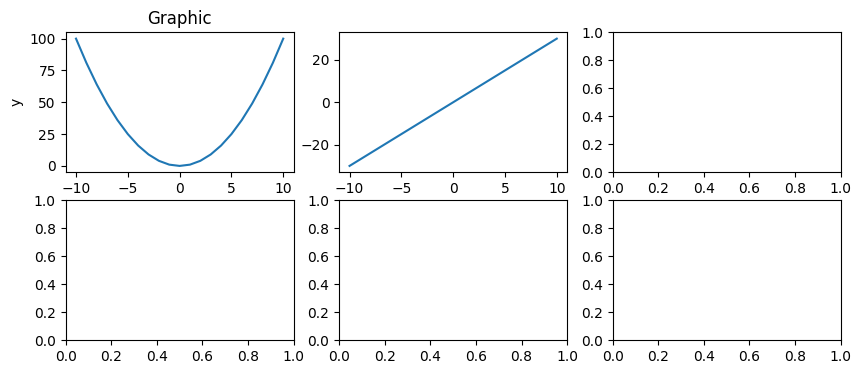

In [33]:
plt.figure(figsize=[10,4])

x=[i for i in range(-10,11)]
y1=[]
for i in x:
    y1.append(i**2)
    
y2=[]
for i in x:
    y2.append(i*3)
    
plt.subplot(2,3,1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphic")
plt.plot(x,y1)

plt.subplot(2,3,2)
plt.plot(x,y2)

plt.subplot(2,3,3)
plt.subplot(2,3,4)
plt.subplot(2,3,5)
plt.subplot(2,3,6)

In [ ]:
plt.figure(figsize=[2,2])

x = [i for i in range(-150,100)]
a = 2
b = 100
c = 70

y = []
for i in x:
    y.append(a*i*i+b*i+c)

plt.plot(x,y)
plt.scatter(x[::10],y[::10],c="red",s=20)


In [46]:
x_value = -90
print(f"When x={x_value}, the value of slope is {2*a*x_value+b}")

When x=-90, the value of slope is -660


## 2. Gradient Descent

$$
\begin{aligned}
\theta_0 &:=\theta_0-\alpha \frac{1}{m} \sum_{i=1}^m\left[\left(h_\theta\left(x_i\right)-y_i\right) x_i^{(0)}\right] \\
\theta_1 &:=\theta_1-\alpha \frac{1}{m} \sum_{i=1}^m\left[\left(h_{\theta}\left(x_i\right)-y_i\right) x_i^{(1)}\right]
\end{aligned}
$$

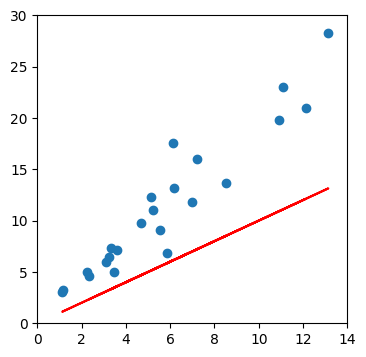

In [2]:
X = [6.1101,  5.5277,  8.5186,  3.2365, 7.0032, 5.8598,  10.9003,  12.1108, 
    2.3355, 3.4547, 3.1109, 3.5789, 5.2067,1.1234, 1.1518, 2.2224, 4.6728, 
    3.3398, 6.1718, 13.1409, 11.1112, 5.1122,7.2135]

y = [17.5920, 9.1302, 13.6620, 6.4421, 11.8540, 6.8233, 19.7968, 20.9464,
     4.6102, 5, 6.0091, 7.0903, 10.9897, 3.0006, 3.2035, 5.0007, 9.7832,
     7.2893, 13.1452, 28.2882, 23.0405, 12.3039, 16.0088]

slope = 1
bias = 0

plt.figure(figsize=[4,4])
plt.xlim(0,14)
plt.ylim(0,30)

y_pred = []
for i in X:
    y_pred.append(i*slope+bias)

plt.scatter(x=X, y=y)
plt.plot(X,y_pred,c="r")

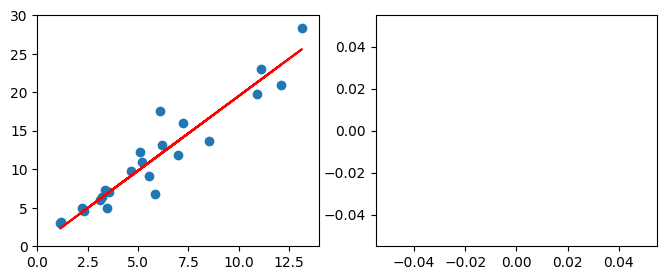

In [14]:
slope = 1
bias = 0
alpha=0.0001
loss_list=[]
for iteration in range(100):
    
    """
    y_pred = []  
    for i in X:
        y_pred.append(i*slope+bias)
    y_sub = []
    for i in range(len(y)):
        y_sub.append((y_pred[i] - y[i])**2)
    loss_list.append(sum(y_sub))
    """
    

    slope_samples_gradient_list = [] # Gradient Descent for slope
    for i in range(len(X)):
        slope_one_sample_gradient = (slope*X[i]+bias-y[i])*X[i]
        slope_samples_gradient_list.append(slope_one_sample_gradient)
    slope-=alpha*sum(slope_samples_gradient_list)

    bias_samples_gradient_list = []  # Gradient Descent for bias
    for i in range(len(X)):
        bias_one_sample_gradient = slope*X[i]+bias-y[i]
        bias_samples_gradient_list.append(bias_one_sample_gradient)
    bias-=alpha*sum(bias_samples_gradient_list)
    
plt.figure(figsize=[8,3])

plt.subplot(1,2,1)
plt.xlim(0,14)
plt.ylim(0,30)

y_pred = []
for i in X:
    y_pred.append(i*slope+bias)

plt.scatter(x=X, y=y)
plt.plot(X,y_pred,color="red")
plt.subplot(1,2,2)
plt.plot(loss_list,color="red")

## 3. NumPy
### 3.1 Import NumPy

In [15]:
import numpy as np

### 3.2 Defining a NumPy Array
#### 3.2.1 Manually Input

In [48]:
my_array = np.array([3,65,7,90])
my_array

array([ 3, 65,  7, 90])

#### 3.2.2 List to NumPy array

In [49]:
my_list=[i for i in range(100)]
my_array = np.array(my_list)
my_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

#### 3.2.3 Special NumPy array

In [ ]:
np.zeros((3, 4))

In [56]:
np.ones((2, 3, 4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

#### 3.2.4 Random Numpy array

In [72]:
np.random.rand(2,3)

array([[0.65056479, 0.03436236, 0.02252284],
       [0.21049378, 0.90125818, 0.1880813 ]])

In [74]:
np.random.randint(2, 10,[2,2])

array([[6, 6],
       [5, 9]])

### 3.3 Attributes of NumPy Array
#### 3.3.1 Shape

In [50]:
my_array.shape

(100,)

#### 3.3.2 Dimension

In [51]:
my_array.ndim

1

#### 3.3.3 Type

In [52]:
my_array.dtype

dtype('int64')

### 3.4 NumPy Operations
#### 3.4.1 Reshape

In [54]:
my_reshaped_array = my_array.reshape(10,10)
my_reshaped_array.shape

(10, 10)

#### 3.4.2 Four Maths Operations

In [57]:
A = np.array([[1, 1],[0, 1]])
B = np.array([[2, 4],[3, 4]])

print(A+B)
print(A-B)
print(A*B)
print(A/B)

[[3 5]
 [3 5]]
[[-1 -3]
 [-3 -3]]
[[2 4]
 [0 4]]
[[0.5  0.25]
 [0.   0.25]]


In [59]:
3*my_array+7

array([  7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,  40,  43,
        46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,  82,
        85,  88,  91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121,
       124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160,
       163, 166, 169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199,
       202, 205, 208, 211, 214, 217, 220, 223, 226, 229, 232, 235, 238,
       241, 244, 247, 250, 253, 256, 259, 262, 265, 268, 271, 274, 277,
       280, 283, 286, 289, 292, 295, 298, 301, 304])

#### 3.4.3 Matrix Multiplication

In [58]:
print(A@B)
print(A.dot(B))
print(np.matmul(B,A))

[[5 8]
 [3 4]]
[[5 8]
 [3 4]]
[[2 6]
 [3 7]]


#### 3.4.4 Transpose

In [102]:
B.T

array([[2, 3],
       [4, 4]])

#### 3.4.5 Concatenate

In [98]:
AB_s = np.stack([A,B])
AB_h = np.hstack([A,B])
AB_v = np.vstack([A,B])

### 3.5 Index Elements in a NumPy Array

In [87]:
my_reshaped_array.min()

0

#### Exercise 2. Could you modify the linear regression code above?

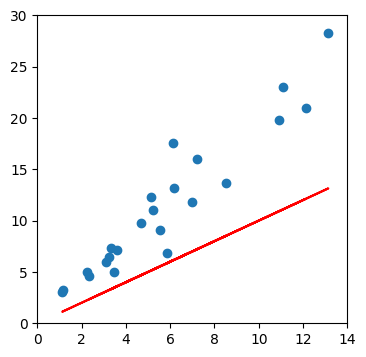

In [17]:
X = [6.1101,  5.5277,  8.5186,  3.2365, 7.0032, 5.8598,  10.9003,  12.1108, 
    2.3355, 3.4547, 3.1109, 3.5789, 5.2067,1.1234, 1.1518, 2.2224, 4.6728, 
    3.3398, 6.1718, 13.1409, 11.1112, 5.1122,7.2135]

y = [17.5920, 9.1302, 13.6620, 6.4421, 11.8540, 6.8233, 19.7968, 20.9464,
     4.6102, 5, 6.0091, 7.0903, 10.9897, 3.0006, 3.2035, 5.0007, 9.7832,
     7.2893, 13.1452, 28.2882, 23.0405, 12.3039, 16.0088]

#slope = 1
#bias = 0

theta = np.array([0,1])

plt.figure(figsize=[4,4])
plt.xlim(0,14)
plt.ylim(0,30)

X_0_array = np.ones((len(X),1))
X_1_array = np.array(X).reshape(-1,1)
X_array = np.hstack([X_0_array, X_1_array])
y_pred_array = X_array@theta

plt.scatter(x=X, y=y)
plt.plot(X_1_array,y_pred_array,c="r")

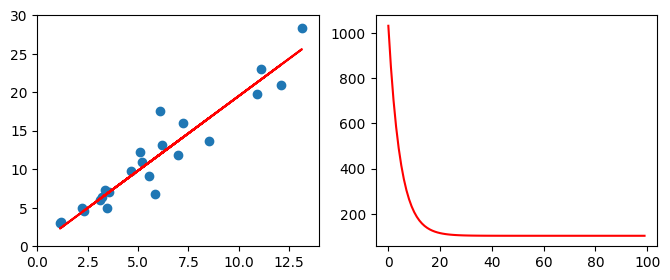

In [18]:
#slope = 1
#bias = 0
theta = np.array([0.0,1.0])
alpha=0.0001
loss_list=[]
for iteration in range(100):
    
    y_pred_array = X_array@theta
    y_sub_array = (y_pred_array-np.array(y))**2
    loss_list.append(sum(y_sub_array))
    

    slope_sample_gradient = (X_array@theta-np.array(y))*np.array(X)
    theta[1]-=alpha*sum(slope_sample_gradient)

    bias_sample_gradient = X_array@theta-np.array(y)
    theta[0]-=alpha*sum(bias_sample_gradient)
    
plt.figure(figsize=[8,3])

plt.subplot(1,2,1)
plt.xlim(0,14)
plt.ylim(0,30)

y_pred_array = X_array@theta

plt.scatter(x=X, y=y)
plt.plot(X_1_array, y_pred_array,color="red")
plt.subplot(1,2,2)
plt.plot(loss_list,color="red")